# Section 1: Principal Component Analysis








In [148]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt

##Step 1: 아래 표를 보고 matrix을 만들세요.
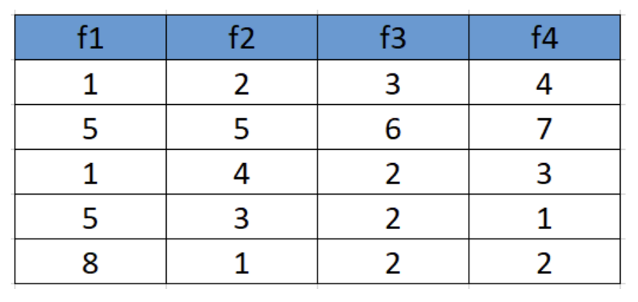


In [156]:
A = np.matrix([[1,2,3,4],
 [5,5,6,7],
 [1,4,2,3],
 [5,3,2,1],
 [8,1,2,2]])
df = pd.DataFrame(A, columns=['f1', 'f2', 'f3','f4'])
print(df)

   f1  f2  f3  f4
0   1   2   3   4
1   5   5   6   7
2   1   4   2   3
3   5   3   2   1
4   8   1   2   2


## Step 2: Z-score로 데이터를 표준화하여 print하세요.

In [157]:
df_std = (df-df.mean()) / df.std()
df_std

,f1,f2,f3,f4
0,-1.000000,-0.632456,0.000000,0.260623
1,0.333333,1.264911,1.732051,1.563740
2,-1.000000,0.632456,-0.577350,-0.173749
3,0.333333,0.000000,-0.577350,-1.042493
4,1.333333,-1.264911,-0.577350,-0.608121


## Step 3: np.cov()를 사용해서 공분산 행렬을 print하세요.

In [158]:
covMatrix = np.cov(df_std.to_numpy(), rowvar=0, bias=True)
print(covMatrix)

[[ 0.8        -0.25298221  0.03849002 -0.14479075]
 [-0.25298221  0.8         0.51120772  0.49449803]
 [ 0.03849002  0.51120772  0.8         0.75235479]
 [-0.14479075  0.49449803  0.75235479  0.8       ]]


## Step 4: LA.eig()를 사용해서 eigenvalue and eigenvector를 print하세요.

In [159]:
w, v = LA.eig(covMatrix)
print("Eigenvalues:", w, "\nEigenvectors:\n", v)

Eigenvalues: [2.01263459 0.8522308  0.31510964 0.02002497] 
Eigenvectors:
 [[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


## Step 5: np.matmul()를 사용해서 4개의 주성분(PCA Components)을 사용하여 주성분 공간으로 변환하세요.

In [160]:
k = 4
B = v[:, :k]
transform_mat = np.matmul(df_std.to_numpy(), B)
print(transform_mat)

[[ 1.40033078e-02  7.55974765e-01  9.41199615e-01 -1.01852226e-01]
 [-2.55653399e+00 -7.80431775e-01 -1.06869861e-01 -5.75705265e-03]
 [-5.14801919e-02  1.25313470e+00 -3.96673397e-01  1.82141242e-01]
 [ 1.01415002e+00  2.38808310e-04 -6.79886182e-01 -2.01224649e-01]
 [ 1.57986086e+00 -1.22891650e+00  2.42229826e-01  1.26692685e-01]]


## Step 6: np.linalg.inv()를 사용해서 데이터를 원복하세요.

In [161]:
B_inv = np.linalg.inv(B)
X_reconstructed = np.matmul(transform_mat, B_inv)
print(X_reconstructed)

[[-1.00000000e+00 -6.32455532e-01 -6.46284943e-17  2.60623346e-01]
 [ 3.33333333e-01  1.26491106e+00  1.73205081e+00  1.56374007e+00]
 [-1.00000000e+00  6.32455532e-01 -5.77350269e-01 -1.73748897e-01]
 [ 3.33333333e-01  7.88377980e-17 -5.77350269e-01 -1.04249338e+00]
 [ 1.33333333e+00 -1.26491106e+00 -5.77350269e-01 -6.08121140e-01]]


## K를 다르게 해서 결과를 확인해보자!


transform_matrix with 1 principal components
[[ 0.01400331]
 [-2.55653399]
 [-0.05148019]
 [ 1.01415002]
 [ 1.57986086]]
------------------------------------------------

         f1        f2        f3        f4
0  4.006804  2.988397  2.985789  3.380769
1  2.757832  5.118326  5.594377  6.911025
2  3.974987  3.042656  3.052242  3.470701
3  4.492755  2.159683  1.970838  2.007214
4  4.767622  1.690939  1.396753  1.230293
------------------------------------------------

transform_matrix with 2 principal components
[[ 1.40033078e-02  7.55974765e-01]
 [-2.55653399e+00 -7.80431775e-01]
 [-5.14801919e-02  1.25313470e+00]
 [ 1.01415002e+00  2.38808310e-04]
 [ 1.57986086e+00 -1.22891650e+00]]
------------------------------------------------

         f1        f2        f3        f4
0  1.926984  3.235731  2.566079  3.178997
1  4.904938  4.862991  6.027665  7.119324
2  0.527392  3.452646  2.356514  3.136235
3  4.492098  2.159761  1.970705  2.007150
4  8.148588  1.288872  2.079036  1.558294
----

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs

Text(0, 0.5, 'error')

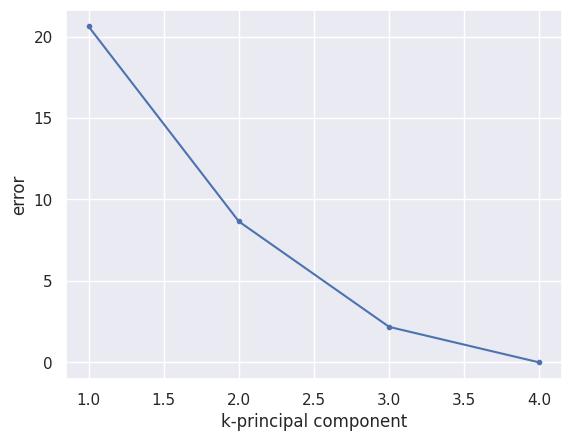

In [166]:
# tranform dataset to principal component space
err = []
pc=[]
for k in range(1, 5):
  B = v[:, :k]
  B2 = np.matmul(np.transpose(B), B)  ## this is needed to ensure B is square matrix for computation
  B3 = np.matmul(B2, np.transpose(B)) ## this is needed to ensure B is square matrix for computation
  transform_mat = np.matmul(df_std.to_numpy(), np.transpose(B3))
  print(f"transform_matrix with {k} principal components")
  print(transform_mat)
  print('------------------------------------------------\n')


  # transform back to original space
  ori_std_mat = np.matmul(transform_mat, B3)
  ori_std_mat_df = pd.DataFrame(ori_std_mat, columns=['f1', 'f2', 'f3','f4'])
  ori_mat = ori_std_mat_df.multiply(df.std()) + df.mean()
  print(ori_mat)
  print('------------------------------------------------\n')

  # compute the error between df and the matrix converted back after PCA
  err.append(np.sum(np.sum(abs(ori_mat - df))))
  pc.append(k)


plt.plot(pc, err, '.-')
plt.xlabel('k-principal component')
plt.ylabel('error')


In [10]:
#@title Q1: We observed that as k-principal component used increases, error decreases. What does this mean?

Answer = "Less information is lost if more principal components is used for for transformation" #@param ["Choose your answer", "Less information is lost if less principal components is used for transformation", "Less information is lost if more principal components is used for for transformation" ]

그래프를 보면 사용한 주성분의 개수가 증가할수록 error가 지속적으로 감소하는 것을 확인할 수 있다. 이는 PCA에서 더 많은 주성분을 사용할수록 원본 데이터가 갖고 있던 분산 정보를 더 많이 보존할 수 있기 때문이다. 주성분의 개수가 적을 때는 데이터가 저차원 공간으로 크게 축소되면서 중요한 정보가 함께 손실되어 error가 크게 나타난다. 반면, 주성분의 개수를 늘리면 원본 데이터의 구조를 설명하는 정보가 더 많이 포함되어 변환 후에도 원래 데이터와의 차이가 줄어들게 된다.

## Section 2 : 더미 데이터로 확인해보자!

In [11]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

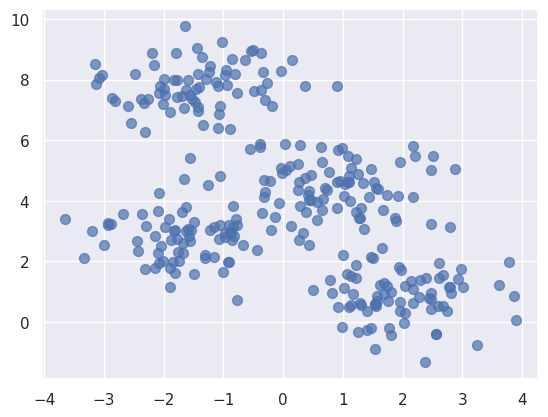

In [12]:
# generate the coordinate pairs
points, cluster_indexes = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)

x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)

### K가 다를때 어떻게 해석할 수 있는지 확인해보자!

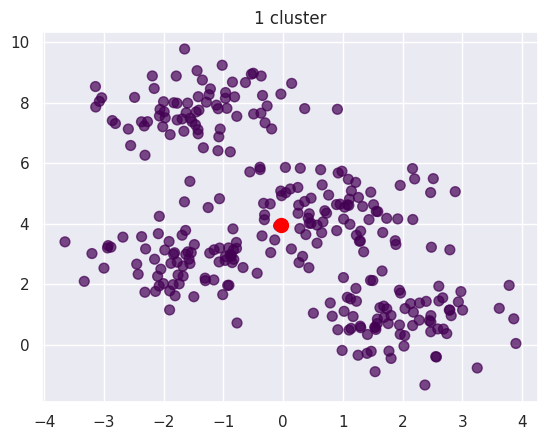

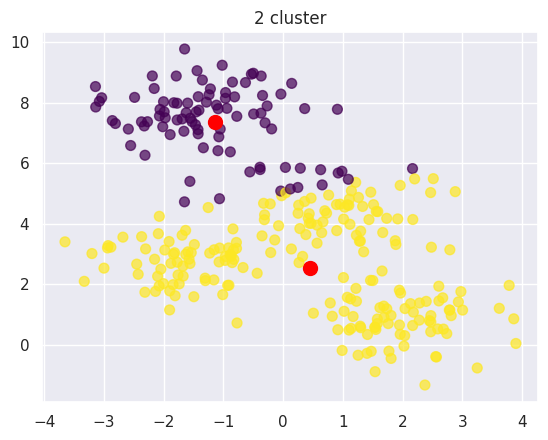

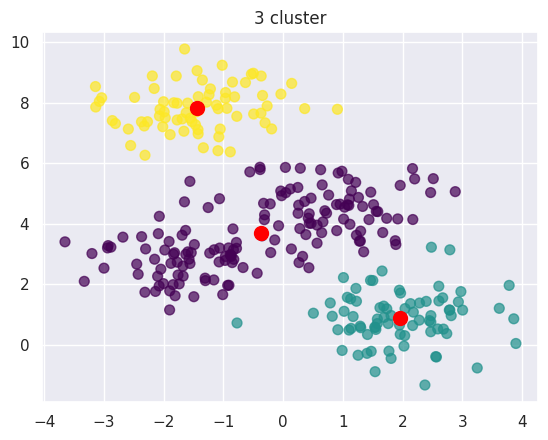

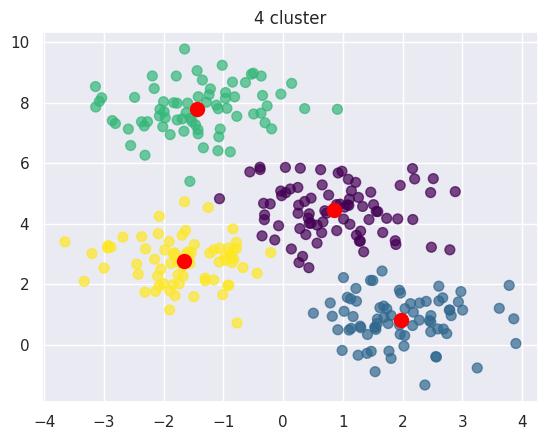

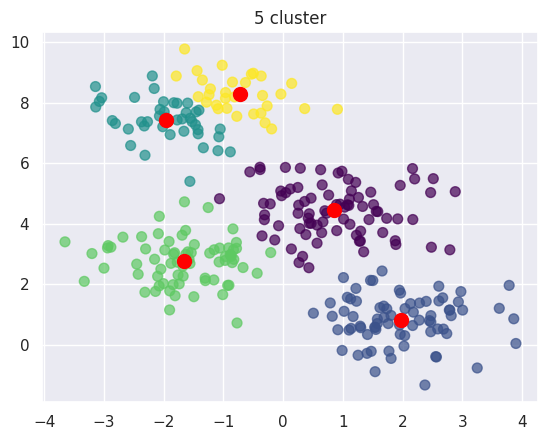

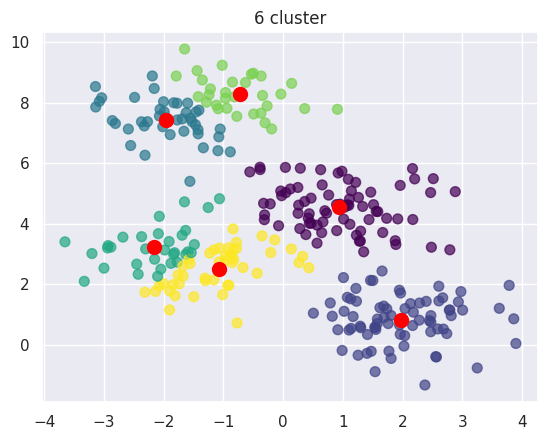

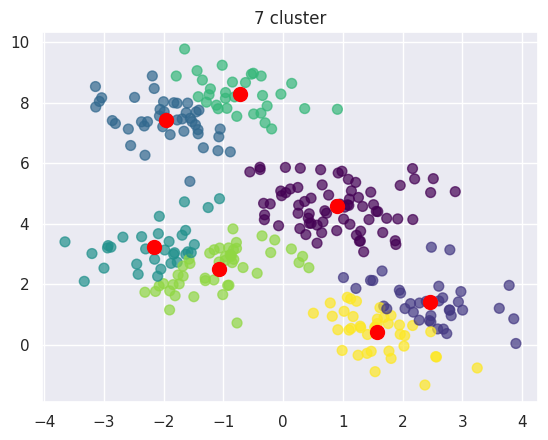

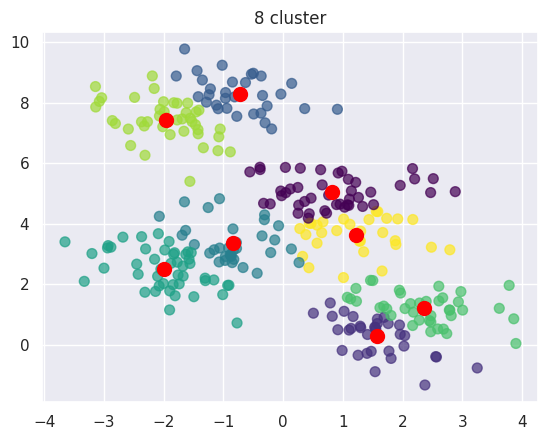

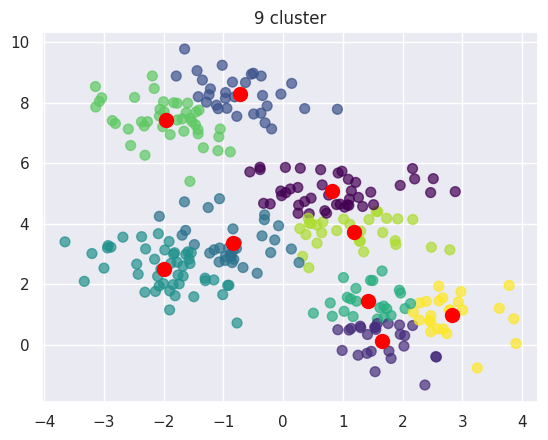

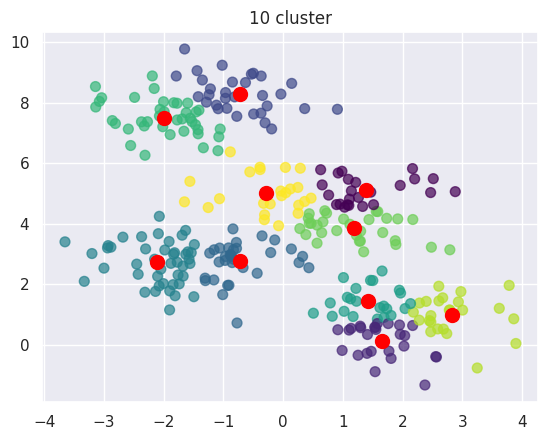

In [13]:
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(points)
  predicted_cluster_indexes = kmeans.predict(points)

  plt.figure()
  plt.title(f'%d cluster' % (k))
  plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')

  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)


# Choose the best K - elbow method

Text(0, 0.5, 'Inertia')

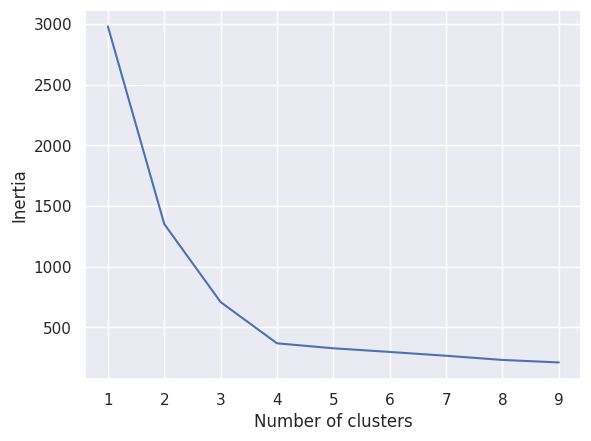

In [14]:
inertias = []

for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [167]:
#@title Q2: Which k is the best based on elbow method?
Answer = "4" #@param ["Choose your answer", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [168]:
#@title Q3: Why?
Answer = "inertia는 각 데이터 포인트와 해당 포인트가 속한 클러스터 중심 간의 거리 제곱합으로, 클러스터 내부의 응집도를 나타내는 지표이다. 즉, inertia 값이 작을수록 동일한 클러스터에 속한 데이터들이 중심점 주변에 더 조밀하게 모여 있음을 의미한다. k=1부터 k=4까지는 클러스터 수를 늘릴 때마다 inertia가 점차 감소하는 모습을 볼 수 있다. 이는 클러스터 내부 응집도가 급격히 향상되면서 데이터 구조를 더 잘 반영하게 되었음을 의미한다. 반면 k=4 이후부터는 inertia 감소 폭이 급격히 줄어들어 그래프가 완만해지는 것으로 보아, 클러스터 수를 추가로 증가시켜도 클러스터 내부의 밀집도가 크게 개선되지 않는다는 것을 알 수 있다. 즉, k=4는 inertia 감소 효율이 뚜렷하게 떨어지는 지점으로, 데이터 응집도를 효과적으로 설명하면서도 불필요한 클러스터 증가를 피할 수 있는 최적의 k라고 볼 수 있다." #@param {type :'string'}

최적의 k: 4

inertia는 각 데이터 포인트와 해당 포인트가 속한 클러스터 중심 간의 거리 제곱합으로, 클러스터 내부의 응집도를 나타내는 지표이다. 즉, inertia 값이 작을수록 동일한 클러스터에 속한 데이터들이 중심점 주변에 더 조밀하게 모여 있음을 의미한다. k=1부터 k=4까지는 클러스터 수를 늘릴 때마다 inertia가 점차 감소하는 모습을 볼 수 있다. 이는 클러스터 내부 응집도가 급격히 향상되면서 데이터 구조를 더 잘 반영하게 되었음을 의미한다. 반면 k=4 이후부터는 inertia 감소 폭이 급격히 줄어들어 그래프가 완만해지는 것으로 보아, 클러스터 수를 추가로 증가시켜도 클러스터 내부의 밀집도가 크게 개선되지 않는다는 것을 알 수 있다. 즉, k=4는 inertia 감소 효율이 뚜렷하게 떨어지는 지점으로, 데이터 응집도를 효과적으로 설명하면서도 불필요한 클러스터 증가를 피할 수 있는 최적의 k라고 볼 수 있다.

# Section 3: Faces recognition example using SVMs



In [129]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [130]:
# Download the data and load it in as a set of numpy arrays
# min_faces_per_person limits the dataset to have the image with at least that amount
lfw_people = fetch_lfw_people(min_faces_per_person=60, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the ID of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print ("Total dataset size:")
print ("n_samples: %d" % n_samples)
print ("n_features: %d" % n_features)
print ("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1348
n_features: 1850
n_classes: 8


([], [])

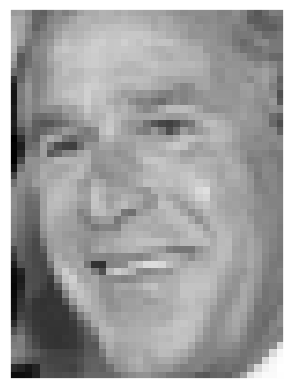

In [131]:
## Look at the data
visualize_face = np.random.randint(0, n_samples)

# Plotting the grey image of the above index
plt.figure(figsize=(3.6, 4.8))
plt.imshow(X[visualize_face].reshape((h, w)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

In [132]:
# split into a training (80%) and testing (20%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Apply PCA to X features, we can change the n_components later
n_components = 100

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

# reconstructing the images from pca output --> eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# Applying pca to training and test set
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 100 eigenfaces from 1078 faces


In [134]:
print("Fitting the classifier to the training set")

# Hyperparameter Tuning
## parameters C and gamma for SVM, see lecture 10 for more explanation
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

# Creating SVM classifier with GridSearch
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5, n_jobs=3)

# Training our classfier
clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search: \n{}".format(clf.best_estimator_))


Fitting the classifier to the training set
Best estimator found by grid search: 
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [135]:
# Evaluation of the model quality on the test set
print("Predicting people's names on the test set\n")
# Predictin for the test set
y_pred = clf.predict(X_test_pca)

# Prediction results
print(classification_report(y_test, y_pred, target_names=target_names))

Predicting people's names on the test set

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.75      0.75        12
     Colin Powell       0.86      0.86      0.86        51
  Donald Rumsfeld       0.69      0.72      0.71        25
    George W Bush       0.86      0.91      0.88        98
Gerhard Schroeder       0.89      0.76      0.82        21
      Hugo Chavez       0.91      0.67      0.77        15
Junichiro Koizumi       1.00      1.00      1.00        10
       Tony Blair       0.87      0.87      0.87        38

         accuracy                           0.85       270
        macro avg       0.85      0.82      0.83       270
     weighted avg       0.85      0.85      0.85       270



## 결과를 확인해보자!


In [136]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits

       inputs:
          images (numpy array) : array of images that we want to show
          titles (string array) :
          h (int) : height of the image
          w (int) : width of the image
          n_row (int) :
          n_col (int) :
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


def title(y_pred, y_test, target_names, i):
    """Helper function to generate the title
    inputs:
      y_pred : List of predictions
      y_test :

    outputs:
    """
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


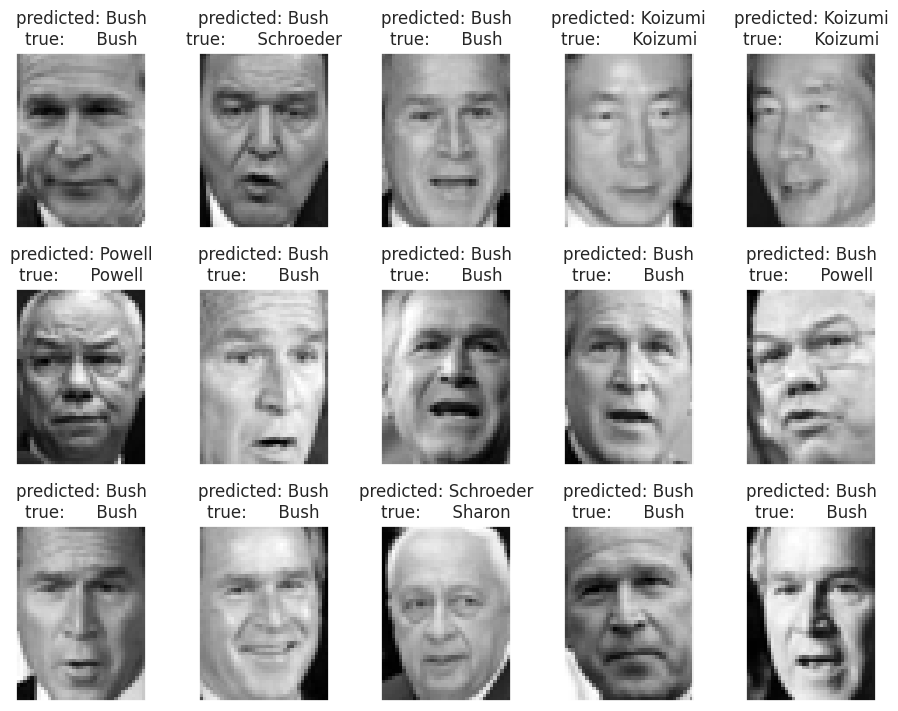

In [137]:
# Generate titles with predicted and true labels for the images
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]
# Call the plot function with necessary parameters
plot_gallery(X_test, prediction_titles, h, w)

plt.show()

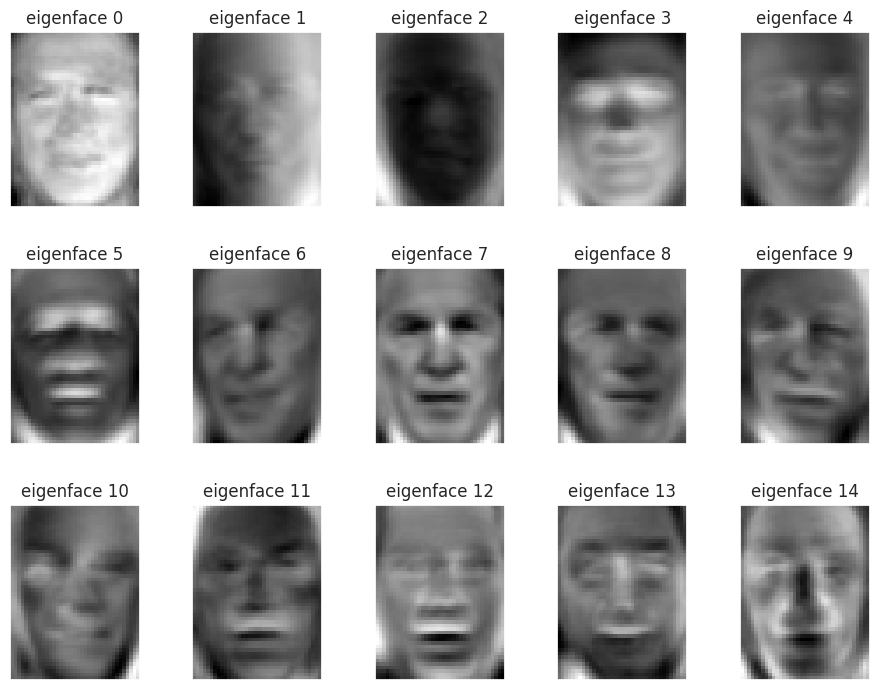

In [138]:
# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [118]:
#@title Q4: Which PCA components give the best results?
Answer = "n_components = 100" #@param ["Choose your answer", "n_components = 50", "n_components = 100", "n_components = 150"]

In [139]:
#@title Q5: Why?
Answer = "Type your PCA 주성분 개수를 50, 100, 150으로 달리하여 얼굴 인식 성능을 비교한 결과, 주성분 수가 증가할수록 전반적인 분류 성능은 향상되는 경향을 보였다. 50개의 주성분을 사용한 경우에는 얼굴의 전체적인 구조는 유지되지만, 인물을 구분하는 데 중요한 세부적인 특징 정보가 충분히 반영되지 못해 정확도와 F1-score가 상대적으로 낮게 나타났다. 반면 100개와 150개의 주성분을 사용했을 때는 정확도와 weighted F1-score가 모두 약 0.85 수준으로 안정적인 성능을 보였으며, 특히 여러 인물을 고르게 인식하는 능력을 나타내는 macro F1-score에서도 두 설정이 유사한 값을 기록하였다. 얼굴 인식 과제에서 필요한 핵심 정보가 이미 100개 내외의 주성분에 대부분 포함되어 있음을 알 수 있었다.  150개의 주성분을 사용한 경우 일부 클래스에서 precision이나 recall이 소폭 향상되었지만, 전체적인 성능 개선 폭은 제한적이었고 100개와 비교했을 때 뚜렷한 차이를 보이지는 않았다. 반면 주성분 수가 증가함에 따라 계산 비용과 모델 복잡도는 증가하게 되므로, 단순히 성능이 가장 높다는 이유만으로 더 많은 주성분을 선택하는 것은 항상 최선의 선택이라고 보기 어렵다. 이러한 결과를 종합하면, 100개의 PCA components는 얼굴 인식에 필요한 주요 특징을 충분히 보존하면서도 정보 손실과 계산 효율성 사이의 균형을 가장 잘 만족시키는 설정으로 판단할 수 있다.answer here" #@param {type :'string'}

### PCA Components = 150

| Class               | Precision | Recall | F1-score | Support |
|---------------------|-----------|--------|----------|---------|
| Ariel Sharon        | 0.88 | 0.58 | 0.70 | 12 |
| Colin Powell        | 0.82 | 0.88 | 0.85 | 51 |
| Donald Rumsfeld     | 0.90 | 0.72 | 0.80 | 25 |
| George W Bush       | 0.79 | 0.95 | 0.86 | 98 |
| Gerhard Schroeder   | 1.00 | 0.71 | 0.83 | 21 |
| Hugo Chavez         | 1.00 | 0.60 | 0.75 | 15 |
| Junichiro Koizumi   | 1.00 | 0.90 | 0.95 | 10 |
| Tony Blair          | 0.92 | 0.87 | 0.89 | 38 |
| **Accuracy**        |       |      | **0.85** | 270 |
| **Macro Avg**       | 0.91 | 0.78 | 0.83 | 270 |
| **Weighted Avg**    | 0.86 | 0.85 | 0.85 | 270 |
<br>
### PCA Components = 100

| Class               | Precision | Recall | F1-score | Support |
|---------------------|-----------|--------|----------|---------|
| Ariel Sharon        | 0.75 | 0.75 | 0.75 | 12 |
| Colin Powell        | 0.86 | 0.86 | 0.86 | 51 |
| Donald Rumsfeld     | 0.69 | 0.72 | 0.71 | 25 |
| George W Bush       | 0.86 | 0.91 | 0.88 | 98 |
| Gerhard Schroeder   | 0.89 | 0.76 | 0.82 | 21 |
| Hugo Chavez         | 0.91 | 0.67 | 0.77 | 15 |
| Junichiro Koizumi   | 1.00 | 1.00 | 1.00 | 10 |
| Tony Blair          | 0.87 | 0.87 | 0.87 | 38 |
| **Accuracy**        |       |      | **0.85** | 270 |
| **Macro Avg**       | 0.85 | 0.82 | 0.83 | 270 |
| **Weighted Avg**    | 0.85 | 0.85 | 0.85 | 270 |
<br>
### PCA Components = 50

| Class               | Precision | Recall | F1-score | Support |
|---------------------|-----------|--------|----------|---------|
| Ariel Sharon        | 0.80 | 0.67 | 0.73 | 12 |
| Colin Powell        | 0.91 | 0.94 | 0.92 | 51 |
| Donald Rumsfeld     | 0.62 | 0.72 | 0.67 | 25 |
| George W Bush       | 0.88 | 0.85 | 0.86 | 98 |
| Gerhard Schroeder   | 0.67 | 0.67 | 0.67 | 21 |
| Hugo Chavez         | 0.89 | 0.53 | 0.67 | 15 |
| Junichiro Koizumi   | 1.00 | 1.00 | 1.00 | 10 |
| Tony Blair          | 0.75 | 0.87 | 0.80 | 38 |
| **Accuracy**        |       |      | **0.82** | 270 |
| **Macro Avg**       | 0.81 | 0.78 | 0.79 | 270 |
| **Weighted Avg**    | 0.83 | 0.82 | 0.82 | 270 |

<br>

PCA 주성분 개수를 50, 100, 150으로 달리하여 얼굴 인식 성능을 비교한 결과, 주성분 수가 증가할수록 전반적인 분류 성능은 향상되는 경향을 보였다. 50개의 주성분을 사용한 경우에는 얼굴의 전체적인 구조는 유지되지만, 인물을 구분하는 데 중요한 세부적인 특징 정보가 충분히 반영되지 못해 정확도와 F1-score가 상대적으로 낮게 나타났다. 반면 100개와 150개의 주성분을 사용했을 때는 정확도와 weighted F1-score가 모두 약 0.85 수준으로 안정적인 성능을 보였으며, 특히 여러 인물을 고르게 인식하는 능력을 나타내는 macro F1-score에서도 두 설정이 유사한 값을 기록하였다. 얼굴 인식 과제에서 필요한 핵심 정보가 이미 100개 내외의 주성분에 대부분 포함되어 있음을 알 수 있었다.

150개의 주성분을 사용한 경우 일부 클래스에서 precision이나 recall이 소폭 향상되었지만, 전체적인 성능 개선 폭은 제한적이었고 100개와 비교했을 때 뚜렷한 차이를 보이지는 않았다. 반면 주성분 수가 증가함에 따라 계산 비용과 모델 복잡도는 증가하게 되므로, 단순히 성능이 가장 높다는 이유만으로 더 많은 주성분을 선택하는 것은 항상 최선의 선택이라고 보기 어렵다. 이러한 결과를 종합하면, 100개의 PCA components는 얼굴 인식에 필요한 주요 특징을 충분히 보존하면서도 정보 손실과 계산 효율성 사이의 균형을 가장 잘 만족시키는 설정으로 판단할 수 있다.